Name: Israt Jahan Tama

Labpartner(s)

In [47]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

**For today's lab you need to install the package cartopy**

In [ ]:
# you can install packages here in a notebook with pip or conda, 
# or in the anaconda navigator in the environments tab (reccommended)

# pip install cartopy
# conda install cartopy

In [48]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [49]:
# generating some random integers

random_integer=np.random.randint(1,101,15)
random_integer
list_x=[]
list_y=[]
list_z=[]

for number in random_integer:
    if number%2==0:
        list_x.append(number)

    elif number%3==0:
        list_y.append(number)
    else:
        list_z.append(number)

print(list_x)
print(list_y)
print(list_z)

[60, 38, 62, 74, 58, 62, 20, 40, 26]
[81]
[35, 11, 71, 29, 11]


**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

(array([5.]), array([11., 71.]), <BarContainer object of 1 artists>)

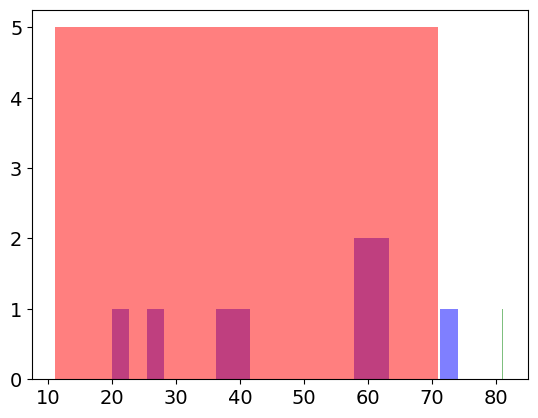

In [50]:
plt.hist(list_x, bins=20, alpha=0.5, label='Divisible by 2 (list_x)', color='blue')
plt.hist(list_y, bins=5, alpha=0.5, label='Divisible by 3 (list_y)', color='green')
plt.hist(list_z, bins=1, alpha=0.5, label='Neither divisible by 2 nor 3 (list_z)', color='red')

# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

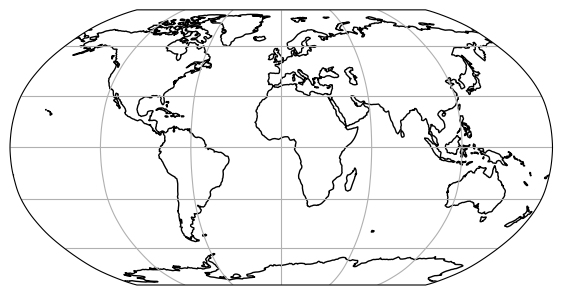

In [51]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

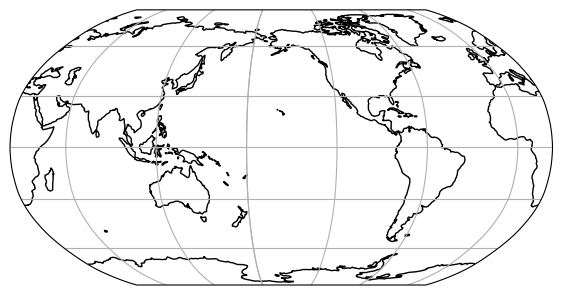

In [52]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
ax.coastlines(resolution='110m')
ax.gridlines()

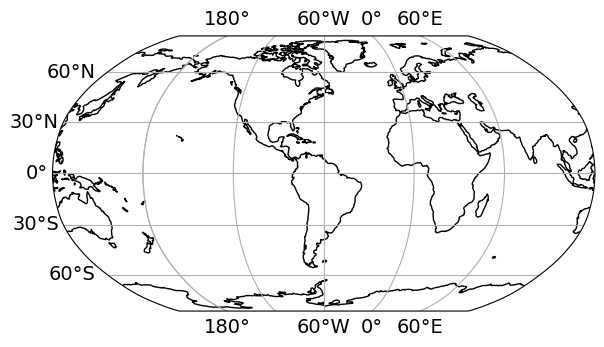

In [53]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = -60))
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

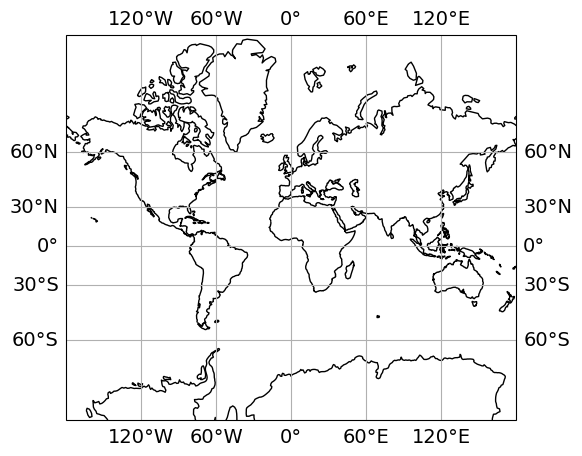

In [54]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

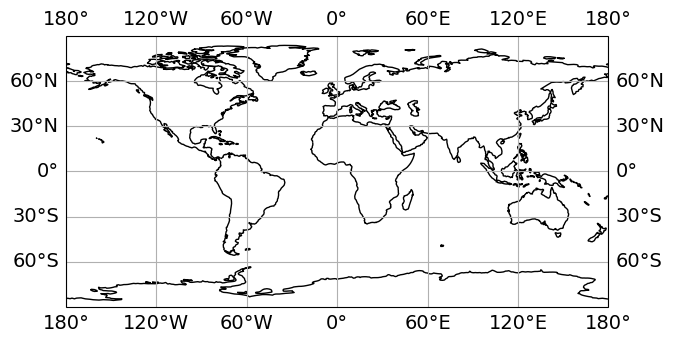

In [55]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)

How do I zoom in?

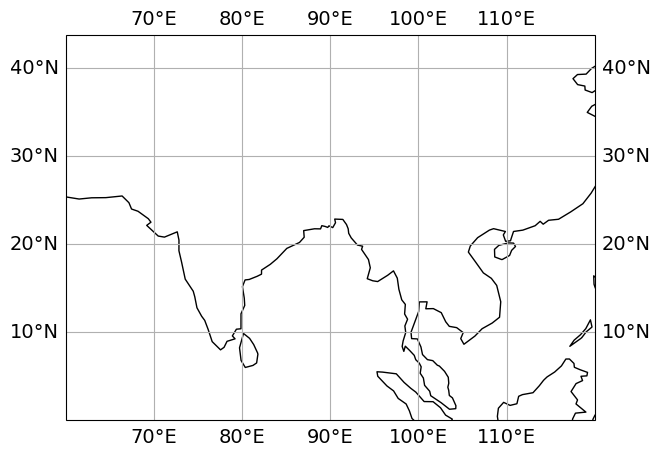

In [56]:
# let's zoom in to S Asia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60, 120, 0, 40]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


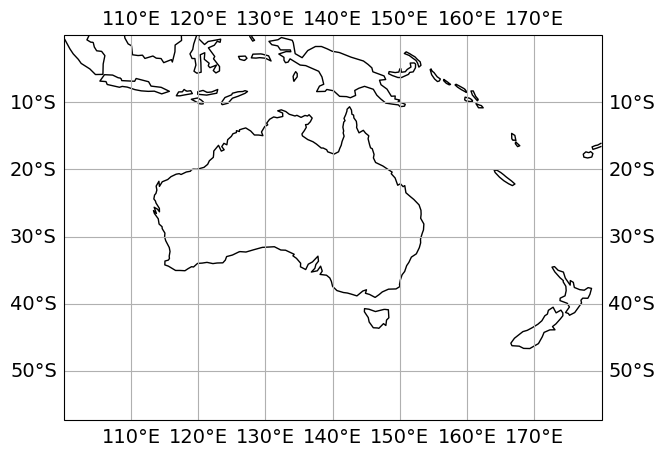

In [57]:
# make a plot of Australia

plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([100, 180, 0, -50]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)



#### Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?

In [58]:
#insert path or url to file here
# download from the internet
link = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

In [59]:
gom_data = xr.open_dataset(link, decode_times=False)

In [60]:
gom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM-TSIS
    institution:                     COAPS-FSU
    source:                          HYCOM archive file
    experiment:                      01.6
    comment:                         p-grid
    history:                         Fri Feb 11 20:08:27 2022: ncks -A -v wnd...
    history_of_appended_files:       Fri Feb 11 20:08:27 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

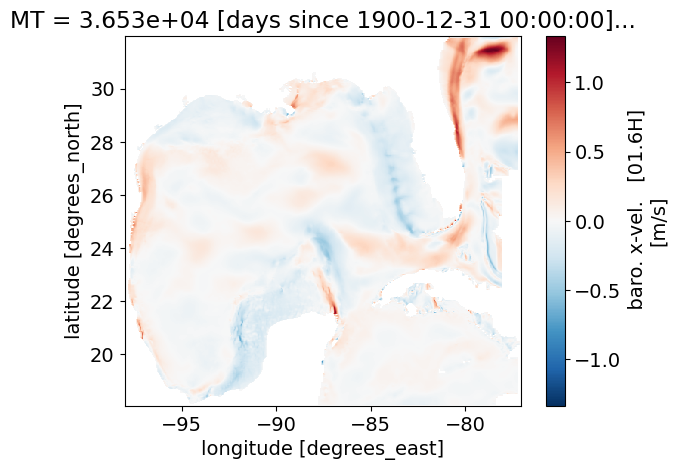

In [61]:
# let's remember what our data looked like, pick a variable to plot

gom_data.u_barotropic_velocity.plot()

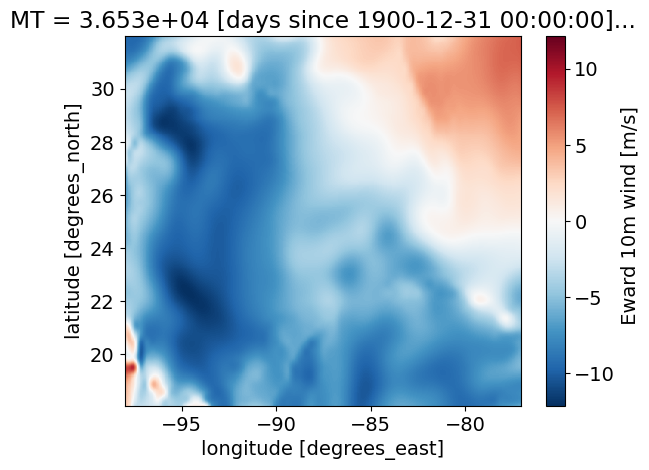

In [62]:
gom_data.wnd_ewd.plot()

In [63]:
lat_min = gom_data.Latitude.min()
print(lat_min)

<xarray.DataArray 'Latitude' ()>
array(18.0916481)


In [64]:
lat_max = gom_data.Latitude.max()
print(lat_max)

<xarray.DataArray 'Latitude' ()>
array(31.96064758)


In [65]:
lon_min = gom_data.Longitude.min()
print(lon_min)

<xarray.DataArray 'Longitude' ()>
array(-98.)


In [66]:
lon_max = gom_data.Longitude.max()
print(lon_max)

<xarray.DataArray 'Longitude' ()>
array(-77.04000092)


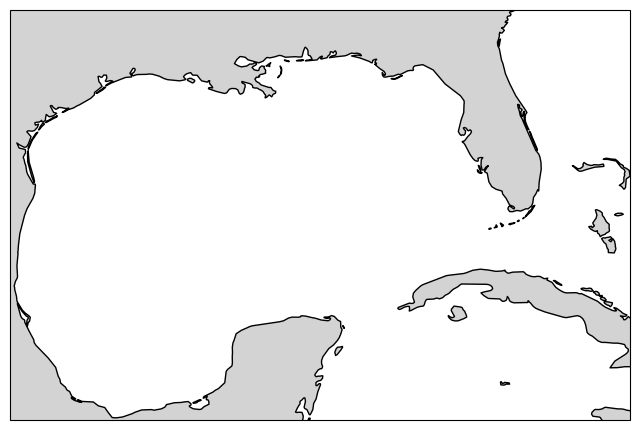

In [67]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 
# note the seqence of arguments for set_extent: x1, x2, y1, y2

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
# you can use named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# or with other methods: https://matplotlib.org/stable/users/explain/colors/colors.html

ax.add_feature(land_50m)

#### Let's make the land color a bit lighter gray

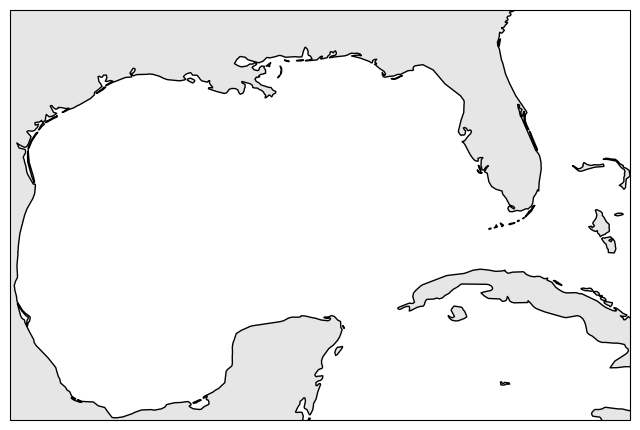

In [68]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 
# note the seqence of arguments for set_extent: x1, x2, y1, y2

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9') # 0 is black and 1 is white
# you can use named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# or with other methods: https://matplotlib.org/stable/users/explain/colors/colors.html

ax.add_feature(land_50m)

#### Now let's add some data

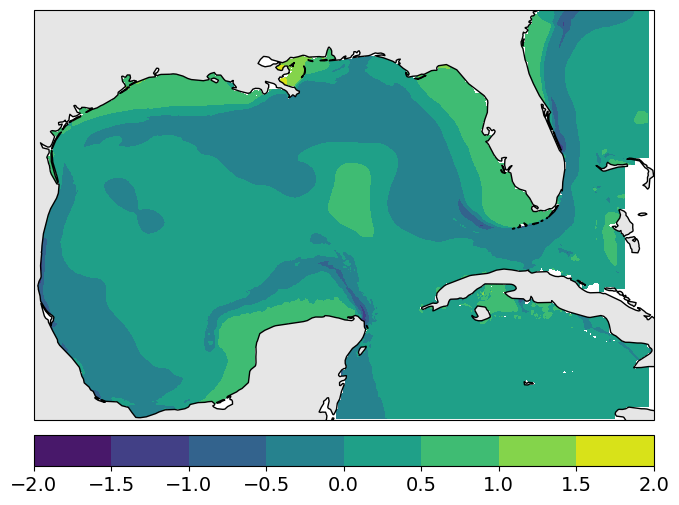

In [69]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.02)


#### Try taking out the options for the colorbar, what happens? What does "pad" do?

#### What is the range of our data?

In [70]:
var.max()

<xarray.DataArray 'ssh' ()>
array(1.58689272)
Coordinates:
    MT       float64 3.653e+04
    Date     float64 ...

In [71]:
var.min()

<xarray.DataArray 'ssh' ()>
array(-1.72738123)
Coordinates:
    MT       float64 3.653e+04
    Date     float64 ...

#### Let's set the countour levels to match our data range. I'm also going to change the colormap
See https://matplotlib.org/stable/users/explain/colors/colormaps.html
Note you can reverse any colormap by appending '_r' to the name

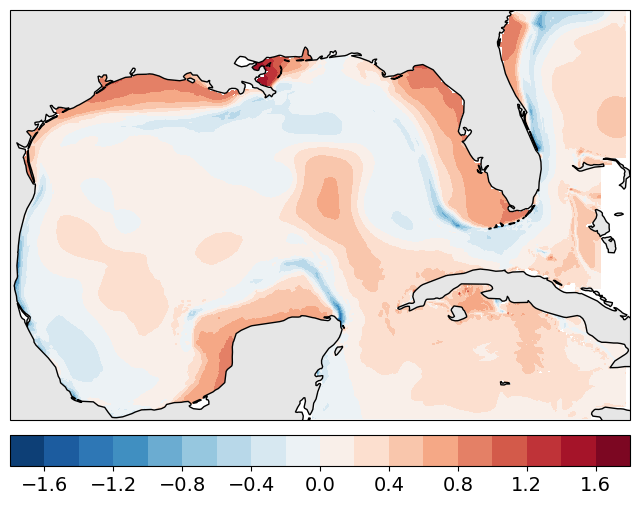

In [72]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# looks like all the data is between around -1.8 to 1.6, let's set the contourlevels to this, centered at zero
# I'm also going to use a diverging colormap centered at zero
step = np.arange(-1.8,1.9,0.2)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) # projection is needed in every plot call

cbar = plt.colorbar(p, orientation='horizontal', pad=0.02)


#### Okay, now let's add some labels

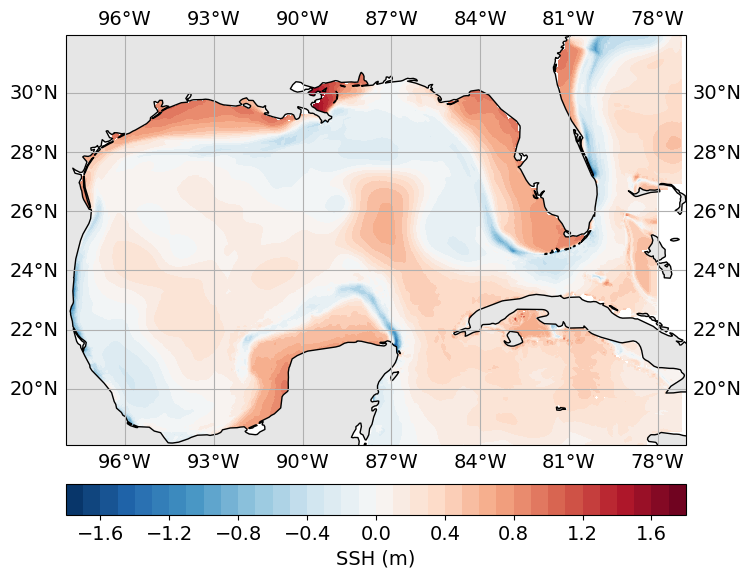

In [73]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-60)))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05)
cbar.set_label("SSH" +' (m)', size = 14)

ax.gridlines(draw_labels=True)


#### These labels are too small for what I want. I need them to be much bigger.

In [74]:
#Note we can easily make the lat/lon and colorbar font size bigger by adjusting the matplotlib parameters
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

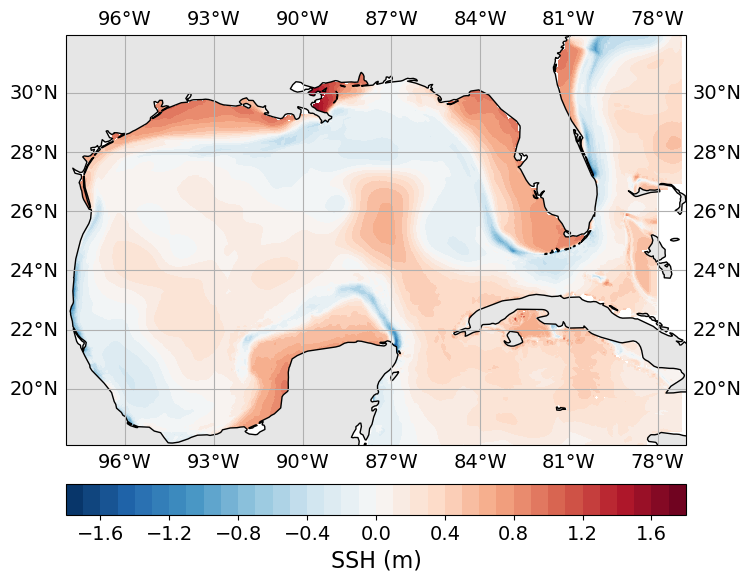

In [35]:
#exact same code as before

fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-60)))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05)
cbar.set_label("SSH" +' (m)', size = 16)

ax.gridlines(draw_labels=True)


#### Now let's explore how to do this all manually so we have total control

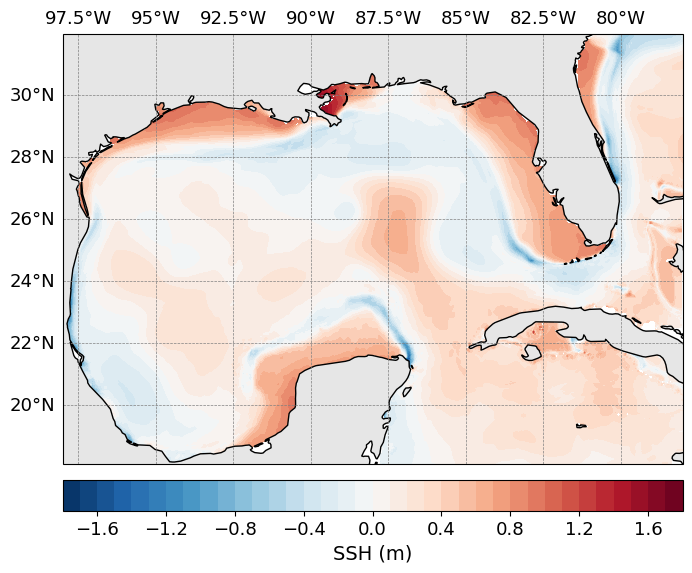

In [75]:
# OR we can use the formatter package to modify the lat/lon labels directly
# note this doesn't change the colorbar tick label fontsize, we have to add a line for that after the colorbar code

# I'm also going to cut out the white bits at right by adjusting lon_max
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.02) # move the colorbar up closer since we moved the longitude to top
cbar.set_label("SSH" +' (m)', size = 14)
# adjust the colorbar font size:
cbar.ax.tick_params(labelsize=13)

#ax.gridlines()

# Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True    
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 13}
gl.ylabel_style = {'size' : 13}

#### Not bad

## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

In [ ]:
#If it is in the weekend, I think it feels like a good pace 

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

In [ ]:
# Chapter 03: part 1: Making a barchart
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("number of medals")

plt.show()

In [ ]:
# Chapter 03: part 1: stacked bar chart
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"]+medals["Silver"], label="Bronze")


# Display the legend
ax.legend()

plt.show()


In [ ]:
# Chapter 03: part 2: creating histograms
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

In [ ]:
# Chapter 03: part 2: step histograms
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], histtype="step", bins=5, label="Rowing")

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], histtype="step", bins=5, label="Gymnastics")

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

In [ ]:
# Chapter 03: part 3: Adding error bars to bar chart
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

In [ ]:
# Chapter 03: part 3: Adding error bars to a plot
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

In [ ]:
# Chapter 03: part 3: creating boxplot
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

In [ ]:
# Chapter 03: part 4: simple scatterplot
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

In [ ]:
# Chapter 03: part 4: Encoding time by color
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)


# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

In [ ]:
#Chapter 04: Part 01: Switching between styles
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use("Solarize_Light2")
fig, ax=plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

In [ ]:
#Chapter 04: Part 02: Saving a file multiple times
plt.show()
fig.savefig("my_figure.png")
fig.savefig("my_figure_300dpi.png", dpi=300)

In [ ]:
#Chapter 04: Part 03: extracting variable and printing unique values
# Extract the "Sport" column
sports_column = summer_2016_medals["Sport"]

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

In [ ]:
#Chapter 04: Part 03: Automate your visualization
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"]==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport,sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")

**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

In the following code I tried to plot u_barotropic_velocity. Besides I tried to customize the colormap, position of the colorbar and 
played around a little bit contours

In [40]:
lon_min = gom_data.Longitude.min()
lon_max =  gom_data.Longitude.max()
lat_min = gom_data.Latitude.min()
lat_max = gom_data.Latitude.max()


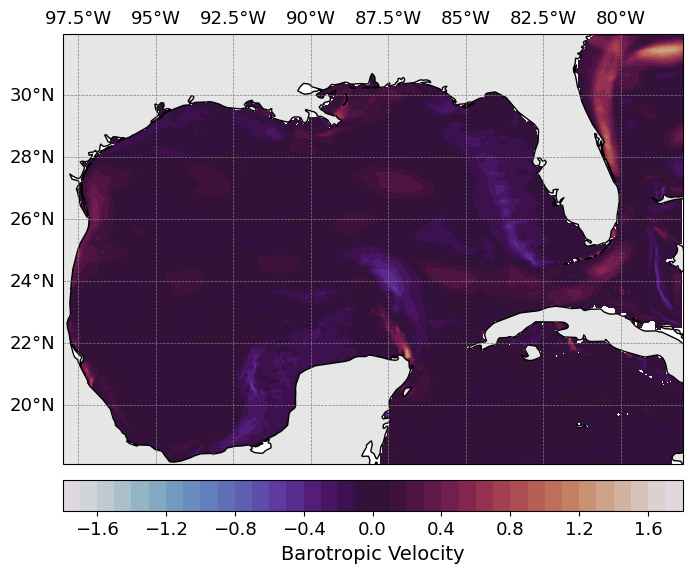

In [37]:
# OR we can use the formatter package to modify the lat/lon labels directly
# note this doesn't change the colorbar tick label fontsize, we have to add a line for that after the colorbar code

# I'm also going to cut out the white bits at right by adjusting lon_max
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.u_barotropic_velocity[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'twilight', 
                    levels = step) 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.02) # move the colorbar up closer since we moved the longitude to top
cbar.set_label("Barotropic Velocity", size = 14)
# adjust the colorbar font size:
cbar.ax.tick_params(labelsize=13)

#ax.gridlines()

# Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True    
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 13}
gl.ylabel_style = {'size' : 13}

In [76]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import Normalize
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

C:\Users\tamai\AppData\Local\Temp\ipykernel_21668\224606269.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')  # Using a diverging colormap with reversed order


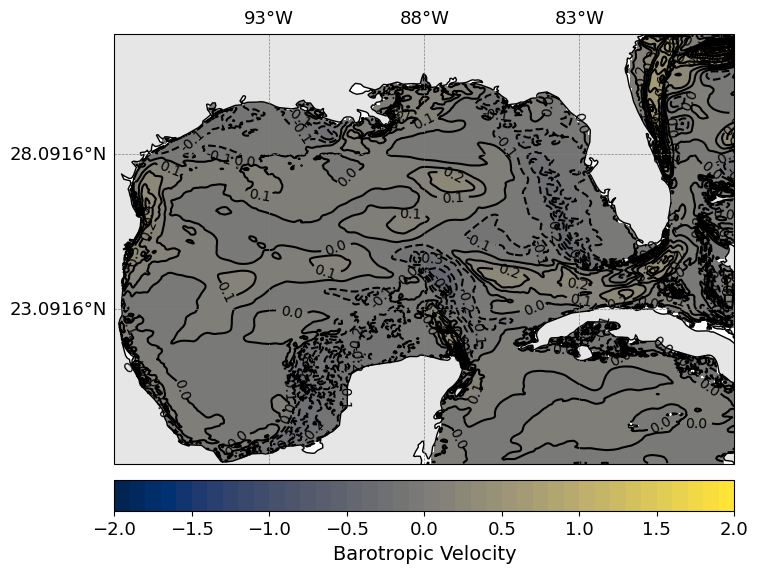

In [38]:


# Define figure and map projection
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max])  # Adjust the longitude maximum to cut white space

# Add land feature with customized style
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black', facecolor='0.9')
ax.add_feature(land_50m)

# Extract the data
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.u_barotropic_velocity[0, :, :]

# Define colormap, normalization, and contour levels
cmap = plt.cm.get_cmap('cividis')  # Using a diverging colormap with reversed order
norm = Normalize(vmin=-2, vmax=2)   # Set a normalization range based on the data range

# Contour plot with filled colors
step = np.arange(-2, 2.1, 0.1)  # Adjusted the step to match the normalization range
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap=cmap, levels=step, norm=norm)

# Add contour lines with labels
cs = ax.contour(x, y, var, colors='black', levels=step, transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')  # Label the contour lines with inline labels

# Customize colorbar
cbar = plt.colorbar(p, orientation='horizontal', pad=0.02, fraction=0.05, ticks=np.arange(-2, 2.1, 0.5))
cbar.set_label("Barotropic Velocity", size=14)
cbar.ax.tick_params(labelsize=13)  # Adjust colorbar tick label font size

# Customize gridlines with formatted labels and custom intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Customize gridline intervals
gl.xlocator = mticker.FixedLocator(np.arange(lon_min, -78, 5))  # Set grid intervals for longitude
gl.ylocator = mticker.FixedLocator(np.arange(lat_min, lat_max, 5))  # Set grid intervals for latitude

# Display the final plot
plt.show()


C:\Users\tamai\AppData\Local\Temp\ipykernel_23128\3134847659.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')  # Using a diverging colormap that works well for positive/negative values


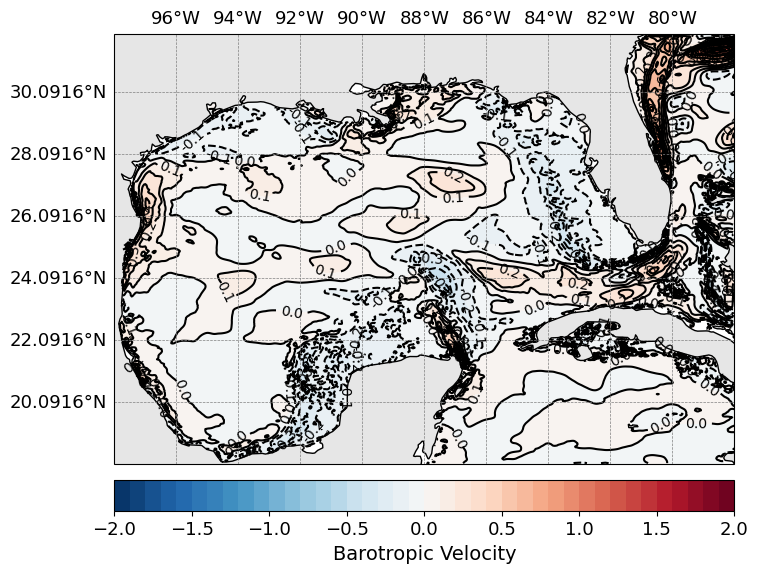

In [46]:

# Define figure and map projection
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max])  # Adjust the longitude maximum to cut white space

# Add land feature with customized style
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black', facecolor='0.9')
ax.add_feature(land_50m)

# Extract the data
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.u_barotropic_velocity[0, :, :]

# Define colormap, normalization, and contour levels
cmap = plt.cm.get_cmap('RdBu_r')  # Using a diverging colormap that works well for positive/negative values
norm = Normalize(vmin=-2, vmax=2)   # Set a normalization range based on the data range

# Contour plot with filled colors
step = np.arange(-2, 2.1, 0.1)  # Adjusted the step to match the normalization range
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap=cmap, levels=step, norm=norm)

# Add contour lines with labels
cs = ax.contour(x, y, var, colors='black', levels=step, transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')  # Label the contour lines with inline labels

# Customize colorbar
cbar = plt.colorbar(p, orientation='horizontal', pad=0.02, fraction=0.05, ticks=np.arange(-2, 2.1, 0.5))
cbar.set_label("Barotropic Velocity", size=14)
cbar.ax.tick_params(labelsize=13)  # Adjust colorbar tick label font size

# Customize gridlines with formatted labels and custom intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Customize gridline intervals for more lines
gl.xlocator = mticker.FixedLocator(np.arange(lon_min, -78, 2))  # More gridlines for longitude
gl.ylocator = mticker.FixedLocator(np.arange(lat_min, lat_max, 2))  # More gridlines for latitude

# Display the final plot
plt.show()


C:\Users\tamai\AppData\Local\Temp\ipykernel_21668\1764909880.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')  # Using a diverging colormap for positive/negative values


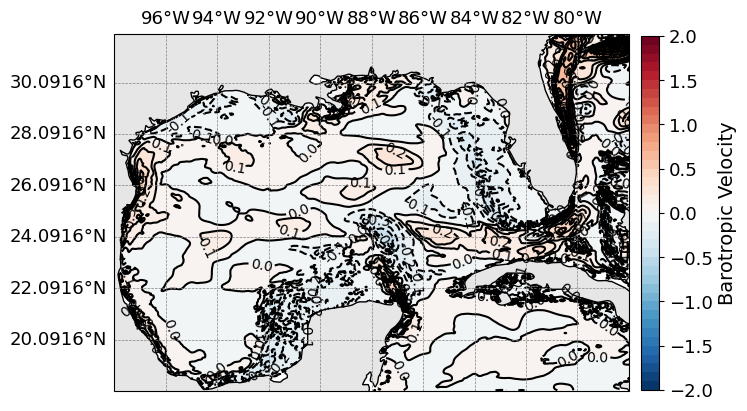

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import Normalize
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# Define figure and map projection
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max])  # Adjust the longitude maximum to cut white space

# Add land feature with customized style
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black', facecolor='0.9')
ax.add_feature(land_50m)

# Extract the data
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.u_barotropic_velocity[0, :, :]

# Define colormap, normalization, and contour levels
cmap = plt.cm.get_cmap('RdBu_r')  # Using a diverging colormap for positive/negative values
norm = Normalize(vmin=-2, vmax=2)   # Set a normalization range based on the data range

# Contour plot with filled colors
step = np.arange(-2, 2.1, 0.1)  # Adjusted the step to match the normalization range
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap=cmap, levels=step, norm=norm)

# Add contour lines with labels
cs = ax.contour(x, y, var, colors='black', levels=step, transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')  # Label the contour lines with inline labels

# Customize colorbar
cbar = plt.colorbar(p, orientation='vertical', pad=0.02, shrink=0.46)  # Vertical colorbar with 80% height of the figure
cbar.set_label("Barotropic Velocity", size=14)
cbar.ax.tick_params(labelsize=13)  # Adjust colorbar tick label font size

# Customize gridlines with formatted labels and custom intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Customize gridline intervals
gl.xlocator = mticker.FixedLocator(np.arange(lon_min, -78, 2))  # Set grid intervals for longitude
gl.ylocator = mticker.FixedLocator(np.arange(lat_min, lat_max, 2))  # Set grid intervals for latitude

# Display the final plot
plt.show()


### This week's project:

#### Note you might want to restart your kernel at this point to dump all the hycom data from memory. Just reload the packages you need

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected daata for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

In [41]:
# Load the dataset (replace 'tasmax_file.nc' with your actual file path)
file_path = r"C:\Users\tamai\OneDrive - Louisiana State University\Fall 2024\OCS 4001\gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc"
ds = xr.open_dataset(file_path, decode_times=False)

# Check the data structure
print(ds)

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...


In [ ]:
tasmax_decade_max = ds['tasmax'].max(dim='time')
tasmax_decade_max

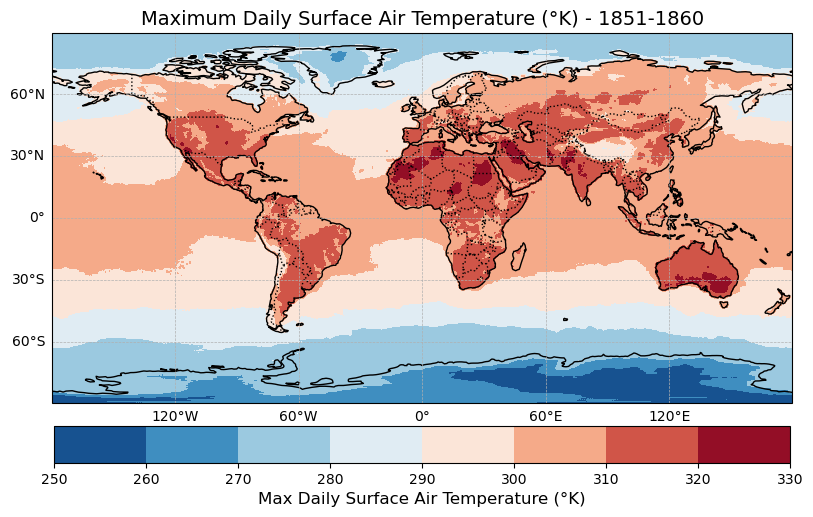

In [86]:
tasmax_decade_max = ds.tasmax.max(dim='time')

# Extract longitude, latitude, and the max temperature
lon = ds.lon
lat = ds.lat
var = tasmax_decade_max

# Plot using Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Add land features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Contour levels and colormap
#levels = np.linspace(var.min(), var.max(), 21)
p = ax.contourf(lon, lat, var, cmap='RdBu_r', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05,shrink=0.95)
cbar.set_label('Max Daily Surface Air Temperature (°K)', size=12)
cbar.ax.tick_params(labelsize=10)

# Customize gridlines and labels
gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Add title
ax.set_title('Maximum Daily Surface Air Temperature (°K) - 1851-1860', fontsize=14)

# Show the plot
plt.show()

**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

In [79]:
# Load the dataset (replace 'tasmax_file.nc' with your actual file path)
file_path_51_60 = r"C:\Users\tamai\Downloads\gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc"
ds1 = xr.open_dataset(file_path_51_60, decode_times=False)

# Check the data structure
print(ds1)


<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...


In [80]:
tasmax_decade_max1 = ds1['tasmax'].max(dim='time')
tasmax_decade_max1

<xarray.DataArray 'tasmax' (lat: 360, lon: 720)>
array([[275.34515, 275.34314, 275.3562 , ..., 275.35498, 275.3487 ,
        275.3544 ],
       [275.74203, 275.71655, 275.7701 , ..., 275.63223, 275.74054,
        275.66245],
       [275.17468, 275.21518, 275.16516, ..., 275.2016 , 275.17554,
        275.2079 ],
       ...,
       [256.42322, 256.67545, 256.331  , ..., 256.71863, 256.4551 ,
        256.66727],
       [260.1464 , 260.12872, 260.1661 , ..., 260.1115 , 260.1357 ,
        260.09198],
       [255.42361, 255.08247, 255.48839, ..., 255.00018, 255.29388,
        255.01366]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75

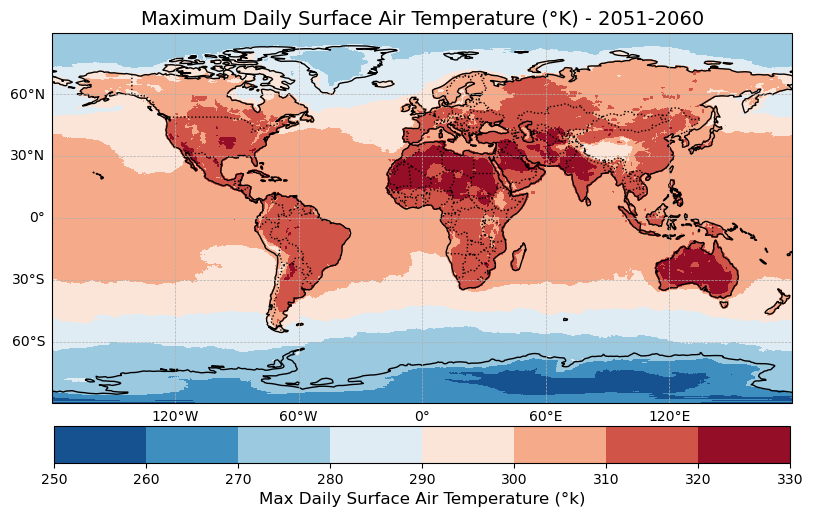

In [85]:


# Extract longitude, latitude, and the max temperature
lon = ds1.lon
lat = ds1.lat
var = tasmax_decade_max1

# Plot using Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Add land features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Contour levels and colormap
#levels = np.linspace(var.min(), var.max(), 21)
p = ax.contourf(lon, lat, var,  cmap='RdBu_r', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05,shrink=0.95)
cbar.set_label('Max Daily Surface Air Temperature (°k)', size=12)
cbar.ax.tick_params(labelsize=10)

# Customize gridlines and labels
gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Add title
ax.set_title('Maximum Daily Surface Air Temperature (°K) - 2051-2060', fontsize=14)

# Show the plot
plt.show()

**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

In [82]:
anomaly = tasmax_decade_max1-tasmax_decade_max
anomaly


<xarray.DataArray 'tasmax' (lat: 360, lon: 720)>
array([[ 0.45614624,  0.43566895,  0.47634888, ...,  0.42782593,
         0.44360352,  0.43377686],
       [ 1.0043335 ,  0.9760742 ,  1.0267334 , ...,  0.87698364,
         1.0013428 ,  0.911499  ],
       [ 0.39492798,  0.4166565 ,  0.3833313 , ...,  0.40576172,
         0.3902893 ,  0.41656494],
       ...,
       [-1.6911011 , -1.4231567 , -1.7795715 , ..., -1.4032593 ,
        -1.6793823 , -1.456543  ],
       [ 0.88616943,  0.87927246,  0.88305664, ...,  0.9199829 ,
         0.9182739 ,  0.8732605 ],
       [-2.8684692 , -3.211563  , -2.8335114 , ..., -3.2392883 ,
        -2.9833984 , -3.2591095 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75

C:\Users\tamai\AppData\Local\Temp\ipykernel_21668\2343262815.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')


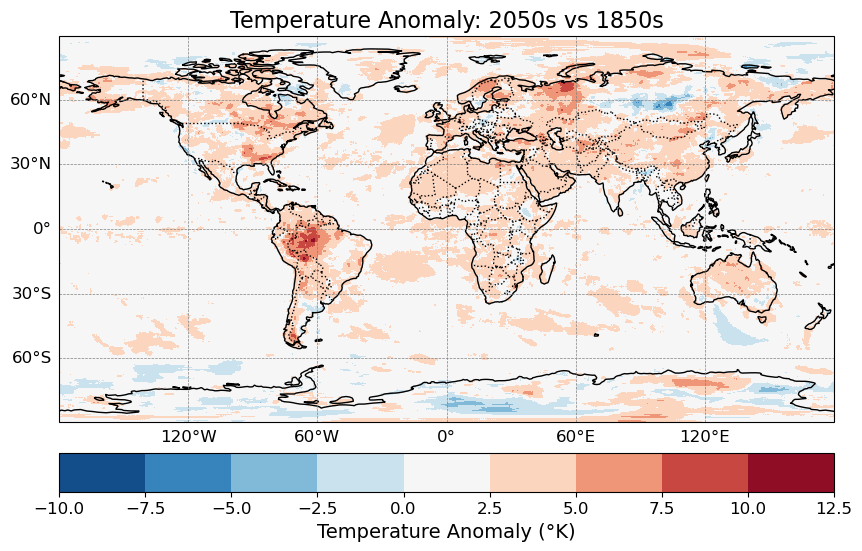

In [83]:
# Set up the figure and map projection for plotting the anomaly
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])  # Adjust extent for your region

# Add country boundaries and land features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Define a diverging colormap centered on zero
cmap = plt.cm.get_cmap('RdBu_r')

# Plot the anomaly

p = ax.contourf(anomaly.lon, anomaly.lat, anomaly, transform=ccrs.PlateCarree(), cmap=cmap)

# Add colorbar with label
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05)
cbar.set_label("Temperature Anomaly (°K)", size=14)
cbar.ax.tick_params(labelsize=12)

# Customize the gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Title and labels
ax.set_title("Temperature Anomaly: 2050s vs 1850s", fontsize=16)

# Display the plot
plt.show()

In [ ]:
# I am from Bangladesh. So I set the extent to (60,120,0,40) to zoom out to Bangladesh to understand the anomaly or projected temperature changes


C:\Users\tamai\AppData\Local\Temp\ipykernel_21668\801043164.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')


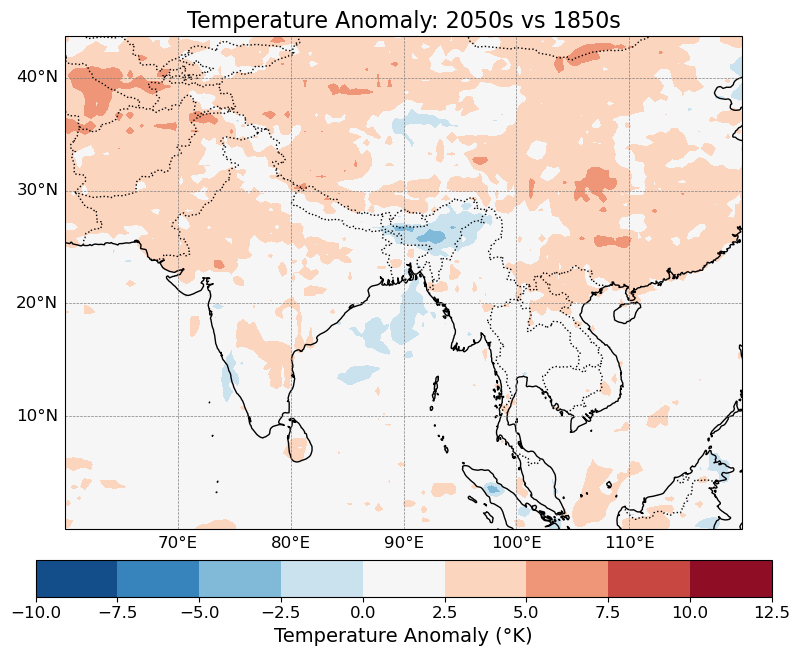

In [84]:
# Set up the figure and map projection for plotting the anomaly
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([60,120,0,40])  

# Add country boundaries and land features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Define a diverging colormap centered on zero
cmap = plt.cm.get_cmap('RdBu_r')

# Plot the anomaly

p = ax.contourf(anomaly.lon, anomaly.lat, anomaly, transform=ccrs.PlateCarree(), cmap=cmap)

# Add colorbar with label
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, shrink=0.95)
cbar.set_label("Temperature Anomaly (°K)", size=14)
cbar.ax.tick_params(labelsize=12)

# Customize the gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Title and labels
ax.set_title("Temperature Anomaly: 2050s vs 1850s", fontsize=16)

# Display the plot
plt.show()

I am from Bangladesh. I have zoomed in to understand the anomaly or projected future temperature change. It looks like that there 
will be 2 to 5 °K in temperature changes in the near future

**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

My research is about different aspects of floods for example flood risk, flood exposure, and flood mitigation using ecosystem services
and investigating disparities in these aspects of floods. The intensity and frequency of floods is increasing due to climate change. Many flood risk models do not incorporate climate change to predict flood risk. It can cause disparity in the different stages of flood mitigation.  This future climate projection will help me to add a new perspective to my research considering the temperature changes. 